# **💭 Cognitive Distortion Classification - Multiclass Classification Using TensorFlow**



##**Data Transformation and Preprocessing**

### **Data Cleaning**

In [ ]:
# !pip install tensorflow==2.15.0 keras==2.15.0

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("Paired")

In [ ]:
sns.color_palette()

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [ ]:
palette = sns.color_palette()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Practica/cognitive_distortions.csv')
df.head()

,Id_Number,Patient Question,Distorted part,Dominant Distortion,Secondary Distortion (Optional)
0,4500,"Hello, I have a beautiful,smart,outgoing and a...",The voice are always fimilar (someone she know...,Personalization,NaN
1,4501,Since I was about 16 years old I’ve had these ...,I feel trapped inside my disgusting self and l...,Labeling,Emotional Reasoning
2,4502,So I’ve been dating on and off this guy for a...,NaN,No Distortion,NaN
3,4503,My parents got divorced in 2004. My mother has...,NaN,No Distortion,NaN
4,4504,I don’t really know how to explain the situati...,I refused to go because I didn’t know if it wa...,Fortune-telling,Emotional Reasoning


In [ ]:
df.shape

(2530, 5)

**Renaming columns and distortion types**

In [ ]:
df.rename(columns={'Id_Number': 'id', 'Patient Question': 'patient_question', 'Distorted part': 'distorted_part',
                   'Dominant Distortion': 'dominant_distortion', 'Secondary Distortion (Optional)': 'secondary_distortion'}, inplace=True)
df.head()

,id,patient_question,distorted_part,dominant_distortion,secondary_distortion
0,4500,"Hello, I have a beautiful,smart,outgoing and a...",The voice are always fimilar (someone she know...,Personalization,NaN
1,4501,Since I was about 16 years old I’ve had these ...,I feel trapped inside my disgusting self and l...,Labeling,Emotional Reasoning
2,4502,So I’ve been dating on and off this guy for a...,NaN,No Distortion,NaN
3,4503,My parents got divorced in 2004. My mother has...,NaN,No Distortion,NaN
4,4504,I don’t really know how to explain the situati...,I refused to go because I didn’t know if it wa...,Fortune-telling,Emotional Reasoning


In [ ]:
df['dominant_distortion'] = df['dominant_distortion'].replace({
    'No Distortion': 'No distortion',
    'Mind Reading': 'Mind reading',
    'Overgeneralization': 'Overgeneralization',
    'Magnification': 'Magnification',
    'Labeling': 'Labeling',
    'Personalization': 'Personalization',
    'Fortune-telling': 'Fortune telling',
    'Emotional Reasoning': 'Emotional reasoning',
    'Mental filter': 'Mental filter',
    'Should statements': 'Should statements',
    'All-or-nothing thinking ': 'All-or-nothing thinking'})

In [ ]:
df.head(10)

,id,patient_question,distorted_part,dominant_distortion,secondary_distortion
0,4500,"Hello, I have a beautiful,smart,outgoing and a...",The voice are always fimilar (someone she know...,Personalization,NaN
1,4501,Since I was about 16 years old I’ve had these ...,I feel trapped inside my disgusting self and l...,Labeling,Emotional Reasoning
2,4502,So I’ve been dating on and off this guy for a...,NaN,No distortion,NaN
3,4503,My parents got divorced in 2004. My mother has...,NaN,No distortion,NaN
4,4504,I don’t really know how to explain the situati...,I refused to go because I didn’t know if it wa...,Fortune telling,Emotional Reasoning
5,4505,Hello. I have been friend with a guy since gra...,NaN,No distortion,NaN
6,4506,"About a year ago to the month, I was in the mi...",NaN,No distortion,NaN
7,4508,Having the structure of our family to focus on...,NaN,No distortion,NaN
8,4509,I’m 14 years old and have social anxiety / dep...,NaN,No distortion,NaN
9,4510,I have been with my fiancé for two years now....,I felt like the response was totally irrationa...,Magnification,NaN


**Handling missing values**

In [ ]:
df.isnull().sum()

,0
id,0
patient_question,0
distorted_part,933
dominant_distortion,0
secondary_distortion,2114


In [ ]:
df["distorted_part"] = df["distorted_part"].fillna('None')
df.head()

,id,patient_question,distorted_part,dominant_distortion,secondary_distortion
0,4500,"Hello, I have a beautiful,smart,outgoing and a...",The voice are always fimilar (someone she know...,Personalization,NaN
1,4501,Since I was about 16 years old I’ve had these ...,I feel trapped inside my disgusting self and l...,Labeling,Emotional Reasoning
2,4502,So I’ve been dating on and off this guy for a...,None,No distortion,NaN
3,4503,My parents got divorced in 2004. My mother has...,None,No distortion,NaN
4,4504,I don’t really know how to explain the situati...,I refused to go because I didn’t know if it wa...,Fortune telling,Emotional Reasoning


In [ ]:
df["secondary_distortion"] = df["secondary_distortion"].fillna('None')
df.head()

,id,patient_question,distorted_part,dominant_distortion,secondary_distortion
0,4500,"Hello, I have a beautiful,smart,outgoing and a...",The voice are always fimilar (someone she know...,Personalization,None
1,4501,Since I was about 16 years old I’ve had these ...,I feel trapped inside my disgusting self and l...,Labeling,Emotional Reasoning
2,4502,So I’ve been dating on and off this guy for a...,None,No distortion,None
3,4503,My parents got divorced in 2004. My mother has...,None,No distortion,None
4,4504,I don’t really know how to explain the situati...,I refused to go because I didn’t know if it wa...,Fortune telling,Emotional Reasoning


In [ ]:
df.isnull().sum()

,0
id,0
patient_question,0
distorted_part,0
dominant_distortion,0
secondary_distortion,0


**Combining 'patient_question' and 'distorted_part' into 'patient_speech'**

In an attempt to increase the accuracy, I will combine the two columns the following way: if there is a (dominant) distortion present, the new column named 'patient_speech' will have the value from the 'distorted_part' column and if there isn't, the column will have the value from the 'patient_question' column.

In [ ]:
df['patient_speech'] = df.apply(lambda row: row['distorted_part'] if row['dominant_distortion'] != 'No distortion' else row['patient_question'], axis=1)
df.head()

,id,patient_question,distorted_part,dominant_distortion,secondary_distortion,patient_speech
0,4500,"Hello, I have a beautiful,smart,outgoing and a...",The voice are always fimilar (someone she know...,Personalization,None,The voice are always fimilar (someone she know...
1,4501,Since I was about 16 years old I’ve had these ...,I feel trapped inside my disgusting self and l...,Labeling,Emotional Reasoning,I feel trapped inside my disgusting self and l...
2,4502,So I’ve been dating on and off this guy for a...,None,No distortion,None,So I’ve been dating on and off this guy for a...
3,4503,My parents got divorced in 2004. My mother has...,None,No distortion,None,My parents got divorced in 2004. My mother has...
4,4504,I don’t really know how to explain the situati...,I refused to go because I didn’t know if it wa...,Fortune telling,Emotional Reasoning,I refused to go because I didn’t know if it wa...


In [ ]:
df.to_csv('cognitive_distortions_clean.csv', index=False)

### **Exploratory Data Analysis**

*How many records are there on average per distortion?*

In [ ]:
df['dominant_distortion'].value_counts().mean()

230.0

In [ ]:
df['dominant_distortion'].value_counts().median()

153.0

The more instances there are in a class (distortion type) the better the model will predict the given distortion. On average, each distortion has around 230 text samples in the dataset.

*How many records are there per distortion?*

In [ ]:
df['dominant_distortion'].value_counts()

,count
dominant_distortion,
No distortion,933
Mind reading,239
Overgeneralization,239
Magnification,195
Labeling,165
Personalization,153
Fortune telling,143
Emotional reasoning,134
Mental filter,122


Looking at the number of records per dominant distortion there is an evident class imbalance that could introduce bias. Although this will improve the model, downsampling comes with the cost of information-loss.

### **Data Preprocessing**



In [ ]:
#Shuffling the entire dataset randomly

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

#Reseting the index of the final dataset

# df = df.reset_index(drop=True)
df.head()

,id,patient_question,distorted_part,dominant_distortion,secondary_distortion,patient_speech
0,2316,My Dad and I usually get on quite well. We hav...,My Dad and I usually get on quite well.,Mental filter,None,My Dad and I usually get on quite well.
1,2059,From the U.S.: I am a 16 year old male and a s...,None,No distortion,None,From the U.S.: I am a 16 year old male and a s...
2,4697,…a little crazy and totally lost: I’m 17 and f...,At times I really do feel like I’m going crazy...,Mind reading,None,At times I really do feel like I’m going crazy...
3,1209,I am a mother of three children under six. I ...,None,No distortion,None,I am a mother of three children under six. I ...
4,565,From a young man in Serbia: I Lack of apathy a...,I Lack of apathy and emotional disconnection f...,Overgeneralization,None,I Lack of apathy and emotional disconnection f...


**Transforming target column into numerical**

In [ ]:
df['dominant_distortion'].unique()

array(['Mental filter', 'No distortion', 'Mind reading',
       'Overgeneralization', 'Labeling', 'All-or-nothing thinking',
       'Should statements', 'Personalization', 'Fortune telling',
       'Emotional reasoning', 'Magnification'], dtype=object)

In [ ]:
df['dominant_distortion'] = pd.Categorical(df['dominant_distortion'])
df['label'] = df['dominant_distortion'].cat.codes

In [ ]:
df.head()

,id,patient_question,distorted_part,dominant_distortion,secondary_distortion,patient_speech,label
0,2316,My Dad and I usually get on quite well. We hav...,My Dad and I usually get on quite well.,Mental filter,None,My Dad and I usually get on quite well.,5
1,2059,From the U.S.: I am a 16 year old male and a s...,None,No distortion,None,From the U.S.: I am a 16 year old male and a s...,7
2,4697,…a little crazy and totally lost: I’m 17 and f...,At times I really do feel like I’m going crazy...,Mind reading,None,At times I really do feel like I’m going crazy...,6
3,1209,I am a mother of three children under six. I ...,None,No distortion,None,I am a mother of three children under six. I ...,7
4,565,From a young man in Serbia: I Lack of apathy a...,I Lack of apathy and emotional disconnection f...,Overgeneralization,None,I Lack of apathy and emotional disconnection f...,8


In [ ]:
code_to_category = dict(enumerate(df['dominant_distortion'].cat.categories))
code_to_category

{0: 'All-or-nothing thinking',
 1: 'Emotional reasoning',
 2: 'Fortune telling',
 3: 'Labeling',
 4: 'Magnification',
 5: 'Mental filter',
 6: 'Mind reading',
 7: 'No distortion',
 8: 'Overgeneralization',
 9: 'Personalization',
 10: 'Should statements'}

In [ ]:
df.to_csv('cognitive_distortions_to_model_no_sampling.csv', index=False)

In [ ]:
df.shape

(2530, 7)

## **Building a Classifier - Deep Learning and Transfer Learning with TensorFlow and TensorFlow Hub**

**Splitting the data into train and test splits**
* Training: 80% of the data
* Test: 20% of the data

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

#Splitting into train, validation, and test sets

train_sentences, test_sentences, train_labels, test_labels = train_test_split(
    df['patient_speech'].to_numpy(), df['label'].to_numpy(), test_size=0.2, random_state=42)

# Checking the lengths
len(train_sentences), len(train_labels), len(test_sentences), len(test_labels)

(2024, 2024, 506, 506)

In [ ]:
#Viewing the first 10 training sentences and their labels

train_sentences[:10], train_labels[:10]

(array(['Several years ago I was in a psychiatric hospital for an eating disorder. In the first 3 months whenever I got brought to the dining room I’d lose control of my arm so I couldn’t move it to pick up a fork to eat my food. I had to have the staff move it for me. What’s odd is I wasn’t resisting or I’d stop the staff members moving my arm for me. And I’d try to give it commands but it wouldn’t move. Obviously this is psychological and I did have control but it wasn’t until 3 months later that I could move my arm to eat food. I really have no idea what this was, or why I did it, no ones ever explained this to me. I never knew you could discommunicate part of your body. I’ve looked online for answers but there was nothing and as far as I’m aware I was the only one who ever did this. Is there a name for this behavior or is it just me who has done this?',
        'Now I’m fat I do everything but I can lose some weight everyday my weight is changing. I can’t focus on my study also I d

**Creating an evaluation function with multiple metrics**

Including the following metrics:
* Accuracy
* Precision
* Recall
* F1-score

In [ ]:
#Evaluation function (y_true, y_pred are 1D arrays)

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
#Function to create TensorBoard callbacks

import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instance to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [ ]:
#Creating directory to save TensorBoard logs

SAVE_DIR = "model_logs"

### **Best Performing Model: USE + Bidirectional-LSTM (Model 4 Improved)**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras

print("TensorFlow version:", tf.__version__)
print("TensorFlow Hub version:", hub.__version__)

TensorFlow version: 2.15.0
TensorFlow Hub version: 0.16.1


In [ ]:
from keras import layers

tf.random.set_seed(42)

#USE Layer

use_encoder_layer = hub.KerasLayer(
    "https://tfhub.dev/google/universal-sentence-encoder/4",
    input_shape=[],
    dtype=tf.string,
    trainable=False,
    name="USE")

inputs = layers.Input(shape=(), dtype=tf.string)
x = use_encoder_layer(inputs)

x = layers.Reshape((1, -1))(x)  #Reshape for LSTM compatibility
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) #Stacking RNN layers requires return_sequences=True
x = layers.Bidirectional(layers.LSTM(128))(x)
x = layers.Dense(128, activation='relu')(x)

outputs = layers.Dense(11, activation='softmax', name="output")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name="model_use_bidirectional")

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_use_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None,)]                 0         
                                                                 
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 reshape_5 (Reshape)         (None, 1, 512)            0         
                                                                 
 bidirectional_5 (Bidirecti  (None, 256)               656384    
 onal)                                                           
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 output (Dense)              (None, 11)                1419      
                                           

In [ ]:
model_history = model.fit(train_sentences,
                          train_labels,
                          epochs=10,
                          validation_data=(test_sentences, test_labels),
                          callbacks=[create_tensorboard_callback(SAVE_DIR, "tf_hub_use_bidirectional")])

Saving TensorBoard log files to: model_logs/tf_hub_use_bidirectional/20241003-100915
Epoch 1/10
64/64 [==============================] - 13s 93ms/step - loss: 1.9390 - accuracy: 0.3775 - val_loss: 1.6473 - val_accuracy: 0.4447
Epoch 2/10
64/64 [==============================] - 3s 42ms/step - loss: 1.5304 - accuracy: 0.4723 - val_loss: 1.5148 - val_accuracy: 0.4960
Epoch 3/10
64/64 [==============================] - 2s 38ms/step - loss: 1.3801 - accuracy: 0.5529 - val_loss: 1.4288 - val_accuracy: 0.5356
Epoch 4/10
64/64 [==============================] - 3s 42ms/step - loss: 1.2514 - accuracy: 0.5815 - val_loss: 1.4156 - val_accuracy: 0.5415
Epoch 5/10
64/64 [==============================] - 3s 44ms/step - loss: 1.1470 - accuracy: 0.6122 - val_loss: 1.4025 - val_accuracy: 0.5771
Epoch 6/10
64/64 [==============================] - 4s 70ms/step - loss: 1.0647 - accuracy: 0.6462 - val_loss: 1.3874 - val_accuracy: 0.5791
Epoch 7/10
64/64 [==============================] - 3s 42ms/step - l

In [ ]:
#Evaluating the model on the validation data

model.evaluate(test_sentences, test_labels)

16/16 [==============================] - 0s 28ms/step - loss: 1.5105 - accuracy: 0.5692


[1.5105488300323486, 0.5691699385643005]

With the new data introduced the model achieves a new test accuracy of **~57%**, as opposed to the **~30%** before.

**Visualizing loss and accuracy values**

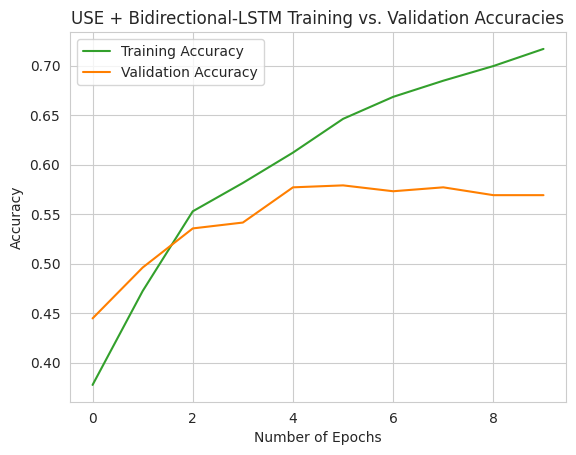

In [ ]:
plt.plot(model_history.history['accuracy'], label='Training Accuracy', color=palette[3])
plt.plot(model_history.history['val_accuracy'], label = 'Validation Accuracy', color=palette[7])
plt.title('USE + Bidirectional-LSTM Training vs. Validation Accuracies')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend();

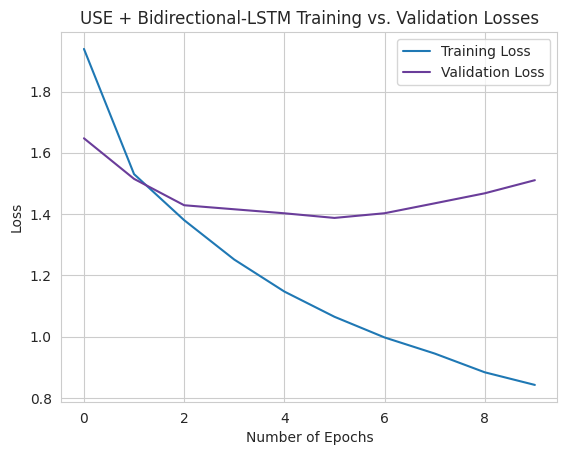

In [ ]:
plt.plot(model_history.history['loss'], label='Training Loss', color=palette[1])
plt.plot(model_history.history['val_loss'], label = 'Validation Loss', color=palette[9])
plt.title('USE + Bidirectional-LSTM Training vs. Validation Losses')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend();

In [ ]:
#Making predictions on the validation data

model_pred_probs = model.predict(test_sentences)
model_pred_probs[:10]

16/16 [==============================] - 2s 47ms/step


array([[3.84362899e-02, 1.43666810e-03, 1.53889123e-03, 2.34801099e-02,
        3.60854832e-03, 3.35745513e-02, 1.23523735e-02, 8.67346883e-01,
        8.88801552e-03, 6.10418851e-03, 3.23341112e-03],
       [1.45310350e-02, 7.67081454e-02, 4.31279503e-02, 2.86255866e-01,
        2.46560797e-02, 3.34566720e-02, 1.87000528e-03, 1.19274577e-04,
        5.14291227e-01, 4.03026119e-04, 4.58072033e-03],
       [1.09023988e-01, 2.42515370e-01, 3.53781611e-01, 2.04345044e-02,
        4.60934751e-02, 5.38937449e-02, 5.92893455e-03, 3.73734103e-04,
        4.10569124e-02, 6.20212741e-02, 6.48765266e-02],
       [2.00097002e-02, 1.07551077e-02, 5.86841762e-01, 2.70830747e-03,
        2.07507893e-01, 1.13301843e-01, 3.35228350e-03, 1.11564268e-05,
        2.33562849e-02, 1.17153581e-02, 2.04402450e-02],
       [4.82853577e-02, 8.93825144e-02, 4.09382373e-01, 7.07568182e-03,
        5.25688939e-02, 2.90027484e-02, 7.14719389e-03, 2.94804613e-05,
        5.48726553e-03, 2.81076580e-01, 7.05619156e-

In [ ]:
#Turning prediction probabilities into 1D tensors

model_preds = tf.argmax(model_pred_probs, axis=1)
model_preds[:20]

<tf.Tensor: shape=(20,), dtype=int64, numpy=
array([ 7,  8,  2,  2,  2,  7, 10,  3,  6,  7, 10,  7,  7,  3,  7,  7,  7,
        3,  7,  6])>

**Confusion matrix of true labels and predictions**

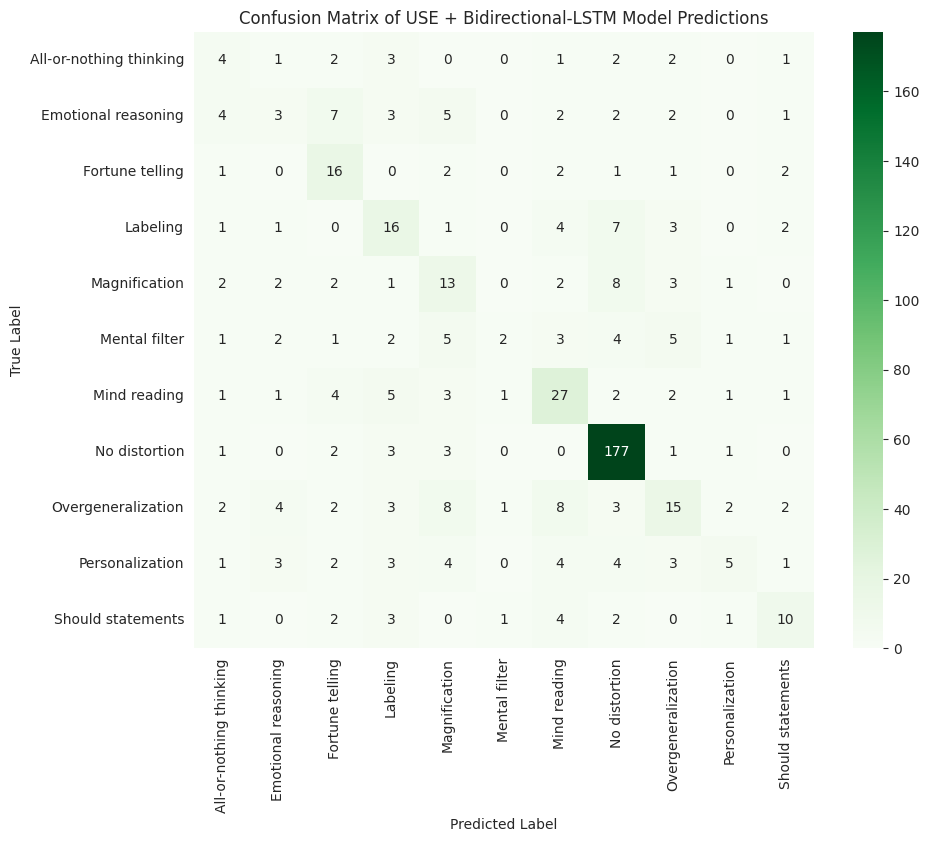

In [ ]:
from sklearn.metrics import confusion_matrix

categories = [code_to_category[i] for i in range(len(code_to_category))]

pred_labels = model_preds

conf_matrix = confusion_matrix(test_labels, pred_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of USE + Bidirectional-LSTM Model Predictions');

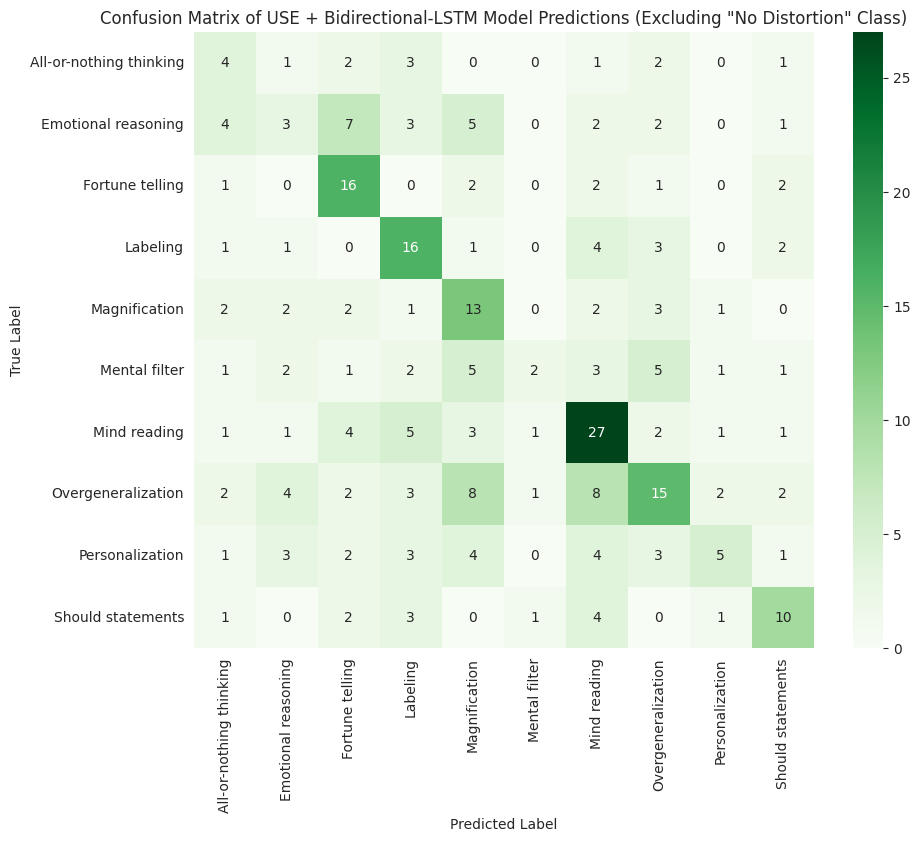

In [ ]:
#Defining the index of 'No distortion' class

no_distortion_index = categories.index('No distortion')

#Filtering out the 'No distortion' class

filtered_categories = [category for i, category in enumerate(categories) if i != no_distortion_index]

conf_matrix = confusion_matrix(test_labels, pred_labels)

#Removing the 'No distortion' row and column from the confusion matrix

filtered_conf_matrix = np.delete(conf_matrix, no_distortion_index, axis=0)  #Remove row
filtered_conf_matrix = np.delete(filtered_conf_matrix, no_distortion_index, axis=1)  #Remove column

#Plotting the confusion matrix

plt.figure(figsize=(10, 8))
sns.heatmap(filtered_conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=filtered_categories, yticklabels=filtered_categories)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of USE + Bidirectional-LSTM Model Predictions (Excluding "No Distortion" Class)')
plt.show()

In [ ]:
#Calculating model results

model_results = calculate_results(test_labels, model_preds)
model_results

{'accuracy': 56.916996047430835,
 'precision': 0.5465668062159905,
 'recall': 0.5691699604743083,
 'f1': 0.5437111643179016}

In [ ]:
from sklearn.metrics import classification_report

classification_report = classification_report(test_labels, model_preds)
print(classification_report)

              precision    recall  f1-score   support

           0       0.21      0.25      0.23        16
           1       0.18      0.10      0.13        29
           2       0.40      0.64      0.49        25
           3       0.38      0.46      0.42        35
           4       0.30      0.38      0.33        34
           5       0.40      0.07      0.12        27
           6       0.47      0.56      0.51        48
           7       0.83      0.94      0.89       188
           8       0.41      0.30      0.34        50
           9       0.42      0.17      0.24        30
          10       0.48      0.42      0.44        24

    accuracy                           0.57       506
   macro avg       0.41      0.39      0.38       506
weighted avg       0.55      0.57      0.54       506



## **Saving the model**

In [ ]:
model.save("use_bidirectional_lstm_best.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load model with custom Hub Layer (required with HDF5 format)
loaded_model = tf.keras.models.load_model("use_bidirectional_lstm_best.h5", custom_objects={"KerasLayer": hub.KerasLayer})

**Evaluating the model on the test data**

In [ ]:
loaded_model.evaluate(test_sentences, test_labels)

16/16 [==============================] - 3s 42ms/step - loss: 1.5105 - accuracy: 0.5692


[1.5105488300323486, 0.5691699385643005]